In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import scipy as stats

In [91]:
mob_data1=pd.read_csv("/content/Processed_Flipdata - Processed_Flipdata.csv")


In [92]:
mob_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [93]:
mob_data1.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [94]:
mob_data1.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [95]:
#Converting Prize column to Int
mob_data1['Prize']=[int(value.replace(",",""))for value in mob_data1['Prize']]


In [96]:
mob_data1['Prize']


0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Prize, Length: 541, dtype: int64

In [97]:
print(mob_data1['Rear Camera'])
print(mob_data1['Front Camera'])

0      13MP
1      13MP
2      50MP
3       8MP
4      50MP
       ... 
536    50MP
537     5MP
538    50MP
539    50MP
540    50MP
Name: Rear Camera, Length: 541, dtype: object
0       5MP
1       5MP
2      16MP
3       5MP
4       5MP
       ... 
536    12MP
537     2MP
538     8MP
539    32MP
540     8MP
Name: Front Camera, Length: 541, dtype: object


In [98]:
mob_data1['Rear Camera'] = mob_data1['Rear Camera'].str.rstrip('MP').astype(int)
mob_data1['Front Camera'] = mob_data1['Front Camera'].str.rstrip('MP').astype(int)

In [99]:
print(mob_data1['Rear Camera'])
print(mob_data1['Front Camera'])

0      13
1      13
2      50
3       8
4      50
       ..
536    50
537     5
538    50
539    50
540    50
Name: Rear Camera, Length: 541, dtype: int64
0       5
1       5
2      16
3       5
4       5
       ..
536    12
537     2
538     8
539    32
540     8
Name: Front Camera, Length: 541, dtype: int64


In [100]:
mob_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    int64  
 7   Front Camera   541 non-null    int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 50.8+ KB


In [101]:
mob_data1.duplicated().sum()


0

In [102]:
#Dropping unnesessary column
mob_data1.drop('Unnamed: 0',axis=1,inplace=True)



1.Memory and RAM have wide range of values, with
a mean of around 110-120 GB and 5-6 GB.

2.Battery capacity varies between 800 and 7000 mAh,
Average-4871 mAh.

3.AI Lens mean around 6%.

4.Mobile heights 4.5 mm-41.94 mm, Mean around 16.43 mm.



**EDA**

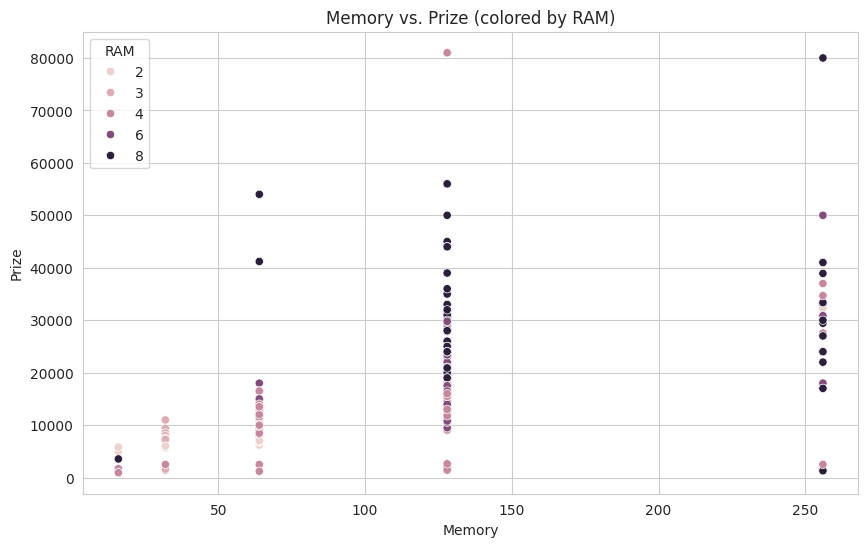

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mob_data1, x='Memory', y='Prize', hue='RAM')
plt.title('Memory vs. Prize (colored by RAM)')
plt.show()

This scatter plot shows higher memory and RAM generally correspond to higher prices, but there is still a significant variation within each group.

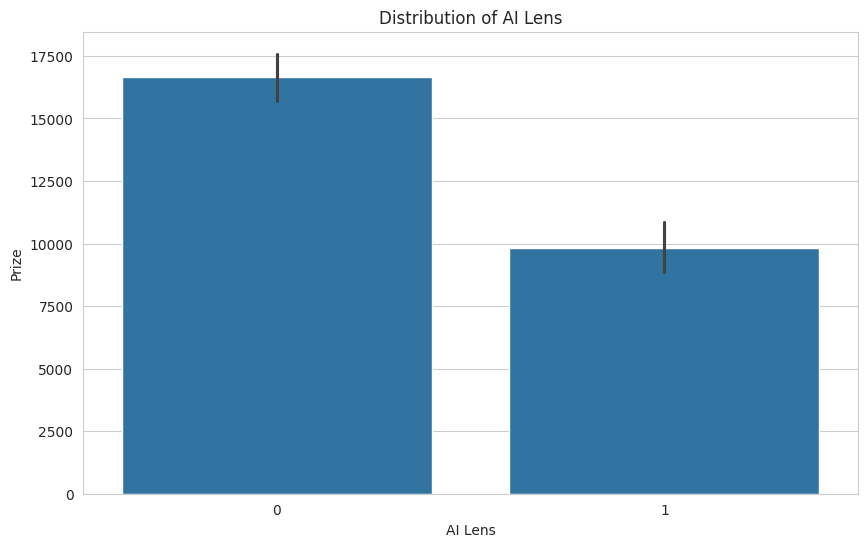

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mob_data1, x='AI Lens',y='Prize')
plt.title('Distribution of AI Lens')
plt.show()

This bar chart shows the distribution of the 'AI Lens' feature, which is a binary variable (0 or 1).


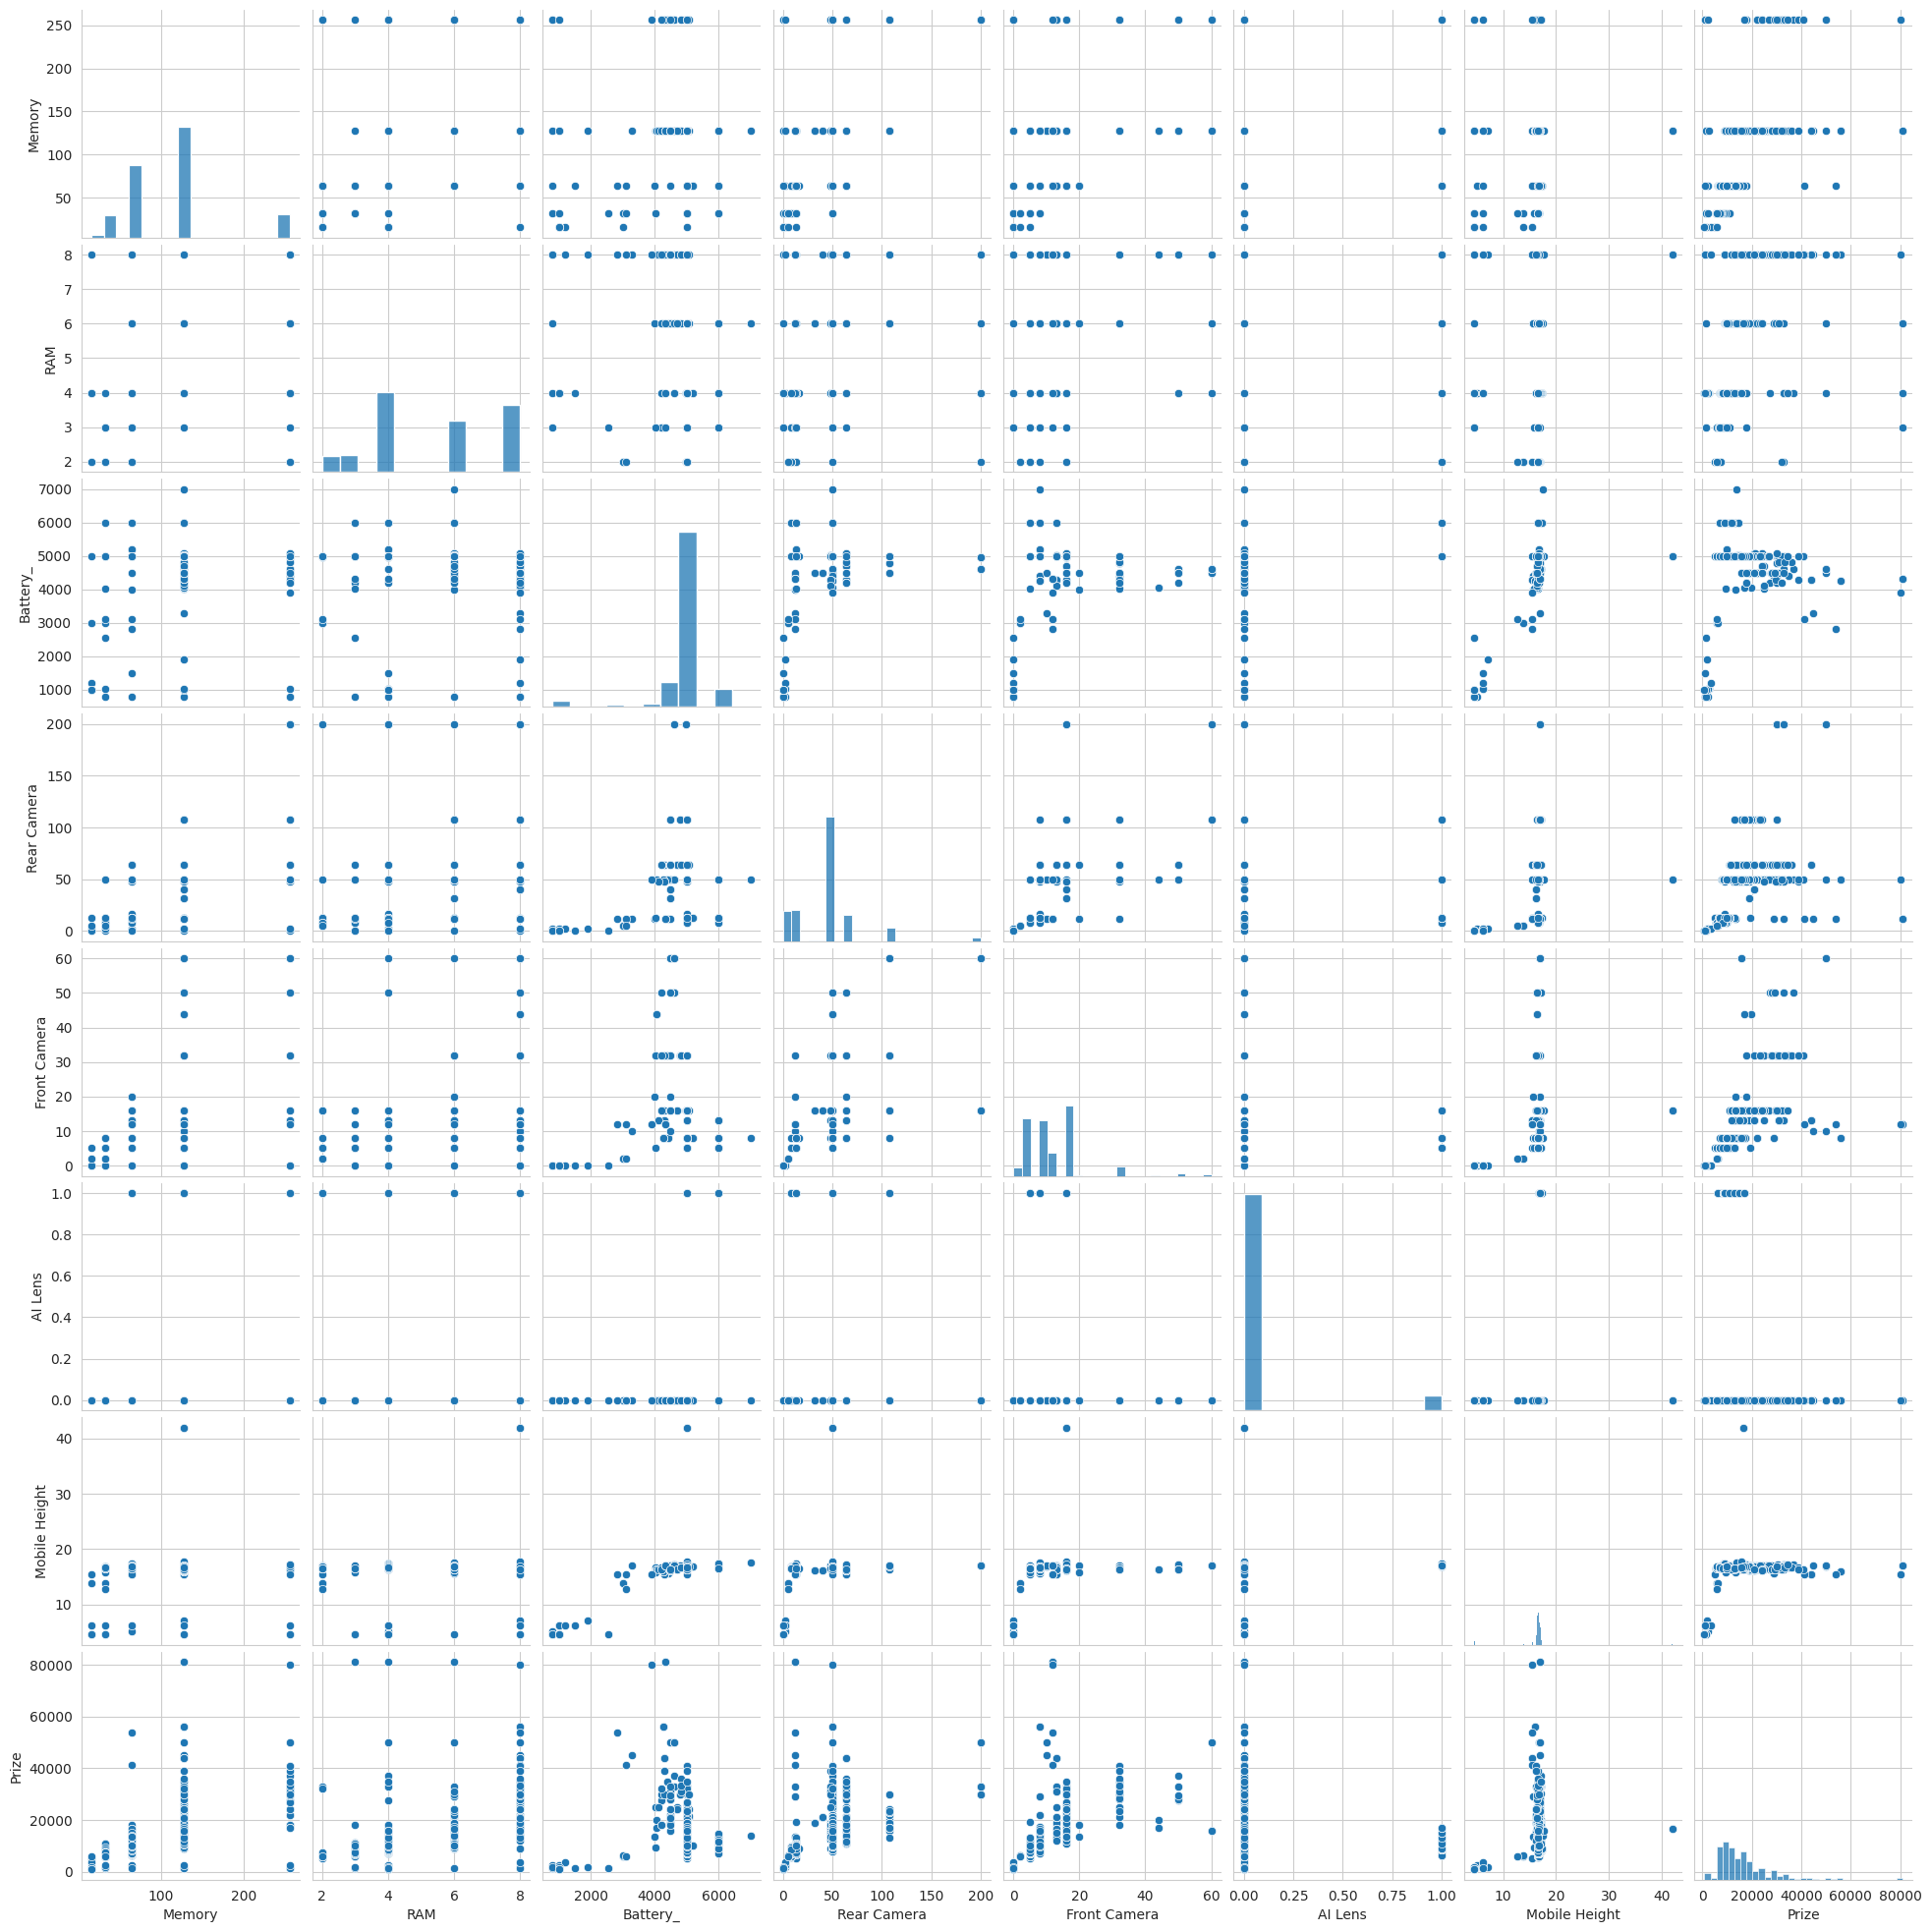

In [105]:
numerical_cols = mob_data1.select_dtypes(include=np.number).columns
custom_palette = sns.color_palette("hls", 12)
sns.pairplot(mob_data1[numerical_cols], palette=custom_palette)

plt.show()

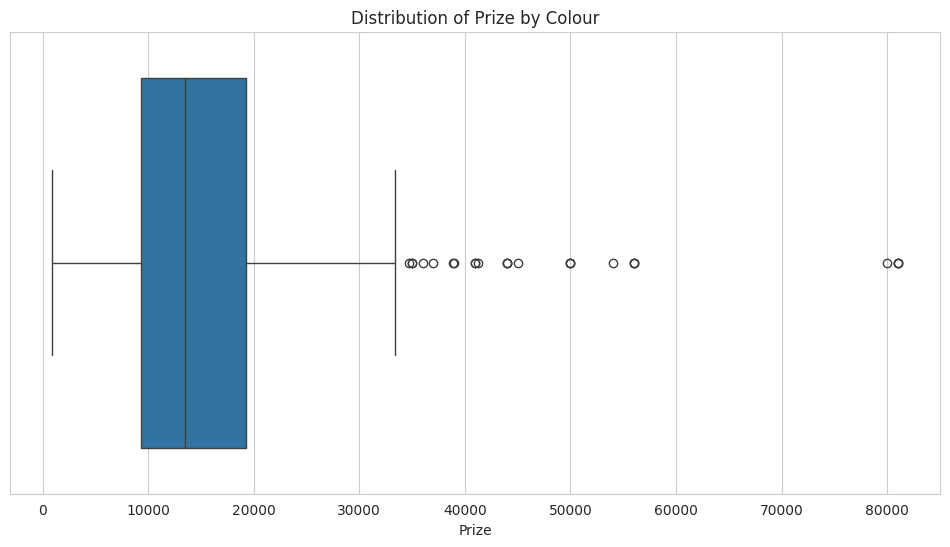

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mob_data1, x='Prize')
plt.title('Distribution of Prize by Colour')
plt.show()

In [107]:
# Columns selection as Int and float
numerical_columns = mob_data1.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR
Q1 = mob_data1[numerical_columns].quantile(0.25)
Q3 = mob_data1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# outliers detection
threshold = 1.5

# Replace outliers
for column in numerical_columns:
    median_value = mob_data1[column].median()

    mob_data1[column] = mob_data1[column].apply(lambda x: median_value if x < (Q1[column] - threshold * IQR[column]) or x > (Q3[column] + threshold * IQR[column]) else x)

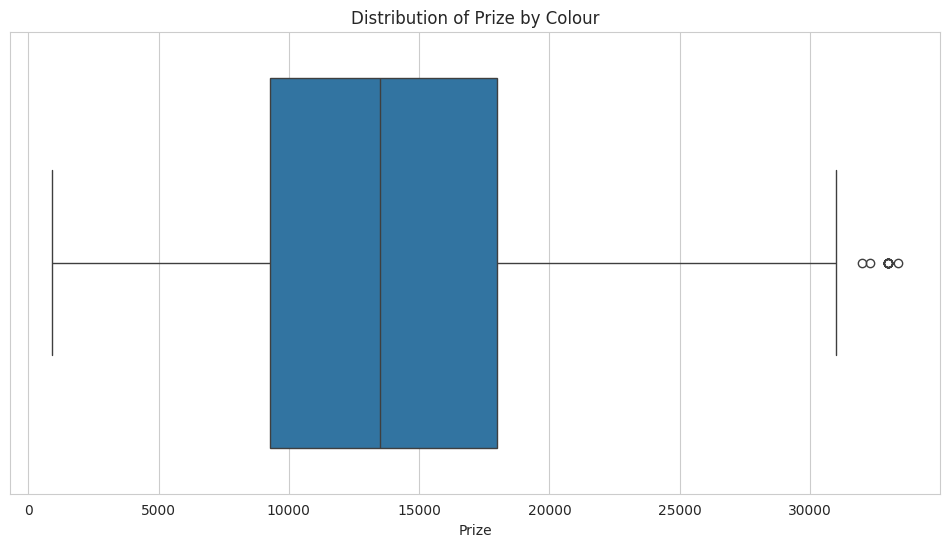

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mob_data1, x='Prize')
plt.title('Distribution of Prize by Colour')
plt.show()

In [109]:

outliers_iqr = (mob_data1[numerical_columns] < (Q1 - threshold * IQR)) | (mob_data1[numerical_columns] > (Q3 + threshold * IQR))
outliers_iqr.sum()

Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Prize            0
dtype: int64

<Axes: xlabel='Prize', ylabel='Count'>

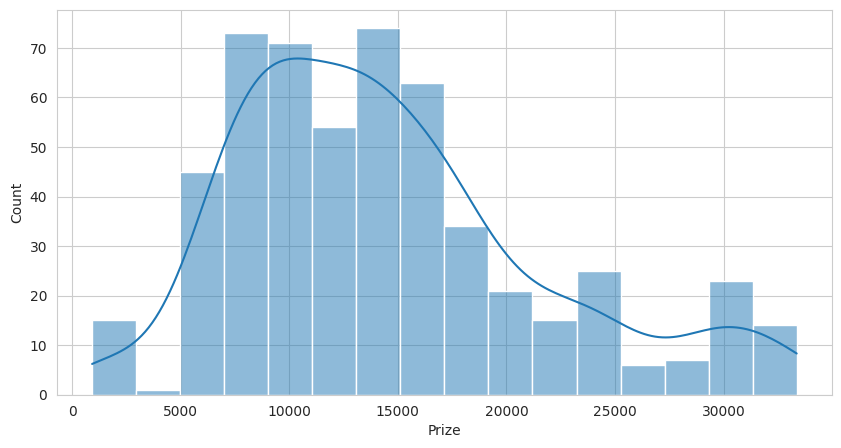

In [110]:
plt.figure(figsize=(10,5))
sns.histplot(mob_data1['Prize'],kde=True)

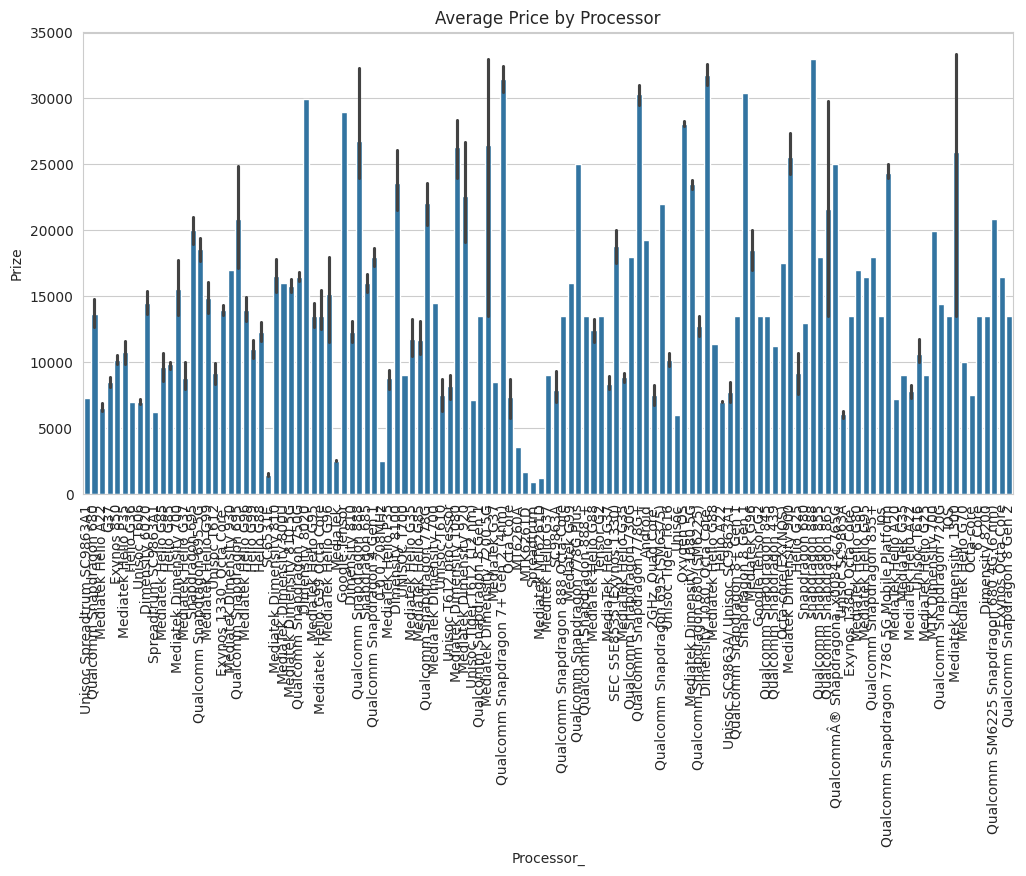

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mob_data1, x='Processor_', y='Prize')
plt.xticks(rotation=90)
plt.title('Average Price by Processor')
plt.show()

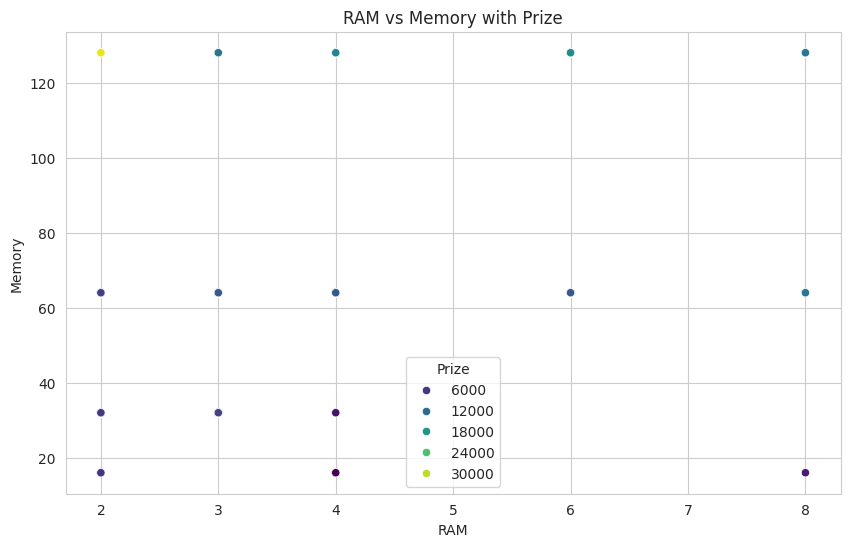

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Memory', hue='Prize', data=mob_data1, palette='viridis')
plt.title('RAM vs Memory with Prize')
plt.xlabel('RAM')
plt.ylabel('Memory')
plt.legend(title='Prize')
plt.show()

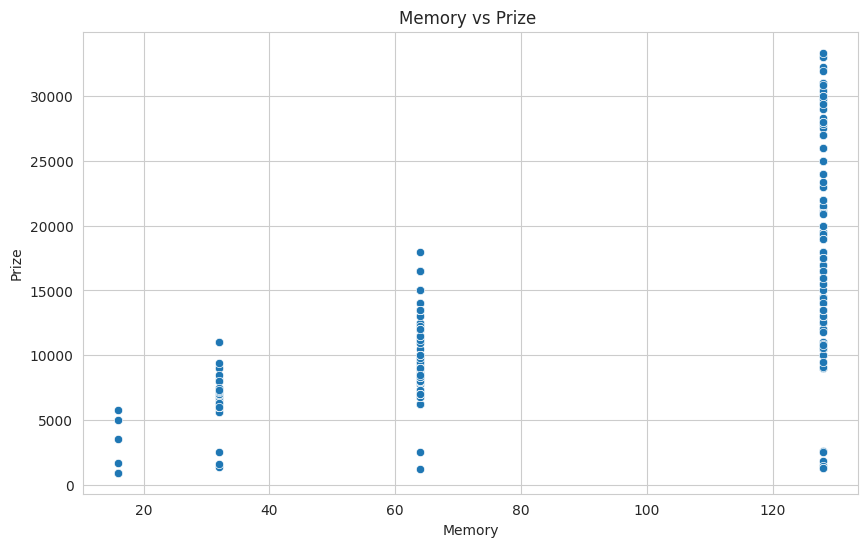

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memory', y='Prize', data=mob_data1)
plt.title('Memory vs Prize ')
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.show()

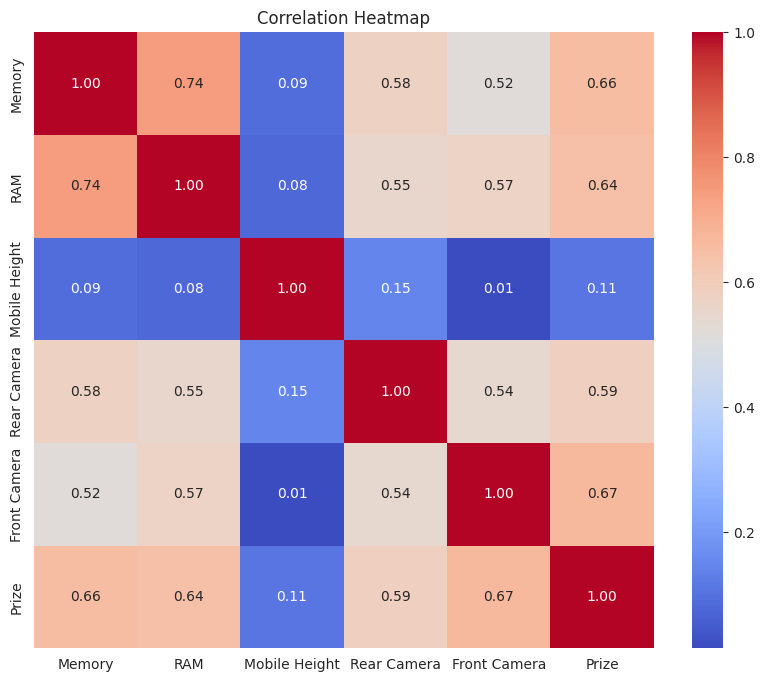

In [114]:
# correlation heatmap
correlation_matrix = mob_data1[['Memory','RAM', 'Mobile Height', 'Rear Camera', 'Front Camera', 'Prize']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Memory and RAM: Strong positive correlation (0.74) suggests that phones with higher memory tend to have higher RAM.

Prize and Rear Camera: Moderate positive correlation (0.8) implies that phones with higher prize may have better rear camera specifications.

RAM and Rear Camera: Moderate positive correlation (0.440) indicates that phones with higher RAM may have better rear camera specifications.

Memory, RAM, and Prize: Moderate positive correlation (0.66 for Memory, 0.64 for RAM) suggests that phones with higher memory and RAM may tend to have higher prices.

In [115]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [116]:
mob_data1['Memory_to_RAM_Ratio'] = mob_data1['Memory'] / mob_data1['RAM']

In [117]:
#Encoding
columns_to_encode = ['Model', 'Colour', 'Processor_']

# Perform label encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    mob_data1[col] = label_encoder.fit_transform(mob_data1[col])

In [118]:
# Feature Scaling
scaler = StandardScaler()
numerical_cols = ['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Rear Camera', 'Front Camera', 'AI Lens', 'Prize']
mob_data1[numerical_cols] = scaler.fit_transform(mob_data1[numerical_cols])

In [119]:
from sklearn.model_selection import train_test_split

# If 'Prize' is the target variable
X = mob_data1.drop('Prize', axis=1)
y = mob_data1['Prize']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [121]:
# Evaluation metrics storage
evaluation_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': []}

In [122]:
# Evaluating each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculation for evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # evaluation metrics
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['RMSE'].append(rmse)

In [123]:
comparison_df = pd.DataFrame(evaluation_metrics)

In [124]:
print(comparison_df)


               Model       MAE       MSE      RMSE
0  Linear Regression  0.384227  0.272355  0.521877
1      Random Forest  0.147703  0.055937  0.236510
2  Gradient Boosting  0.182873  0.078483  0.280148


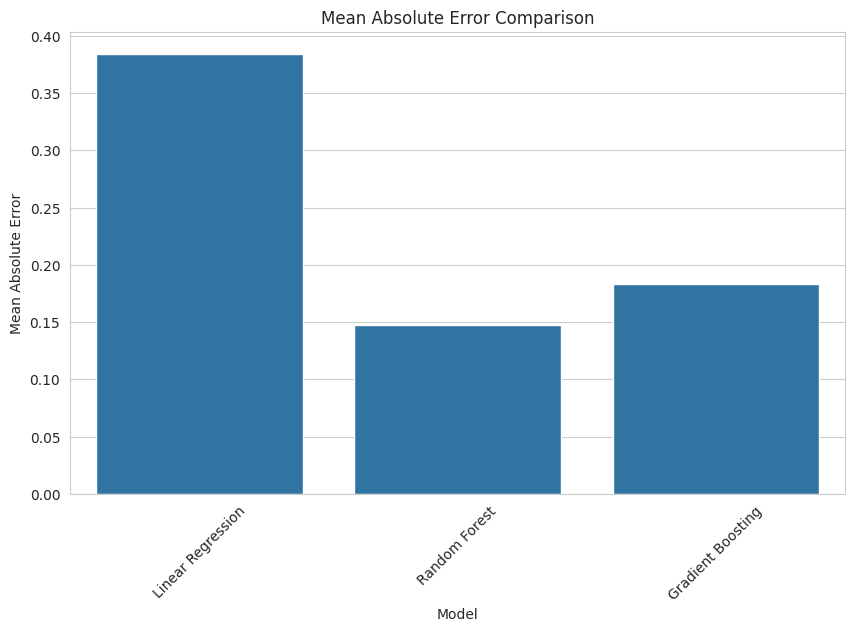

In [125]:
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=comparison_df)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()

In [126]:
from sklearn.model_selection import GridSearchCV

# Random Forest fine-tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Gradient Boosting fine-tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

In [127]:
best_gb_model


GradientBoostingRegressor(max_depth=4)

In [128]:
# Feature importance analysis for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Feature importance analysis for Gradient Boosting
gb_feature_importances = best_gb_model.feature_importances_

# Create DataFrames to display feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
gb_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_feature_importances})

# Sort DataFrames by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:\n", rf_feature_importance_df)
print("\nGradient Boosting Feature Importances:\n", gb_feature_importance_df)

Random Forest Feature Importances:
                 Feature  Importance
6          Front Camera    0.399901
2                Memory    0.139469
9            Processor_    0.116071
0                 Model    0.090143
3                   RAM    0.083118
5           Rear Camera    0.062651
8         Mobile Height    0.053164
1                Colour    0.040871
10  Memory_to_RAM_Ratio    0.014612
4              Battery_    0.000000
7               AI Lens    0.000000

Gradient Boosting Feature Importances:
                 Feature  Importance
6          Front Camera    0.442625
2                Memory    0.139053
0                 Model    0.125551
9            Processor_    0.123305
3                   RAM    0.058073
8         Mobile Height    0.043574
5           Rear Camera    0.026173
1                Colour    0.022211
10  Memory_to_RAM_Ratio    0.019434
4              Battery_    0.000000
7               AI Lens    0.000000



**Random Forest Feature Importances:**

The most important feature is "Front Camera," ,"Model" and "Phone Company." Where, "Battery_" and "AI Lens" have zero importance. Features like "Memory," "RAM," and "Rear Camera" also contribute but are less influential compared to "Front Camera" and other top features.

**Gradient Boosting Feature Importances:**

Similarly, "Front Camera" is the most important feature for the Gradient Boosting model."Phone Company" and "Processor_." "Battery_" and "AI Lens" again have zero importance in this model. The importance of features like "Memory," "RAM," and "Mobile Height" is consistent with the Random Forest model.

Overall, both models prioritize "Front Camera," "Model," and "Phone Company" as the most important features. However, there are slight differences in the rankings and importance values of other features between the two models.

In [129]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
rf_cv_mae = -rf_cv_scores.mean()

# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
gb_cv_mae = -gb_cv_scores.mean()

print("Random Forest Cross-validation MAE:", rf_cv_mae)
print("Gradient Boosting Cross-validation MAE:", gb_cv_mae)

Random Forest Cross-validation MAE: 0.3346819181992194
Gradient Boosting Cross-validation MAE: 0.31403341728203826


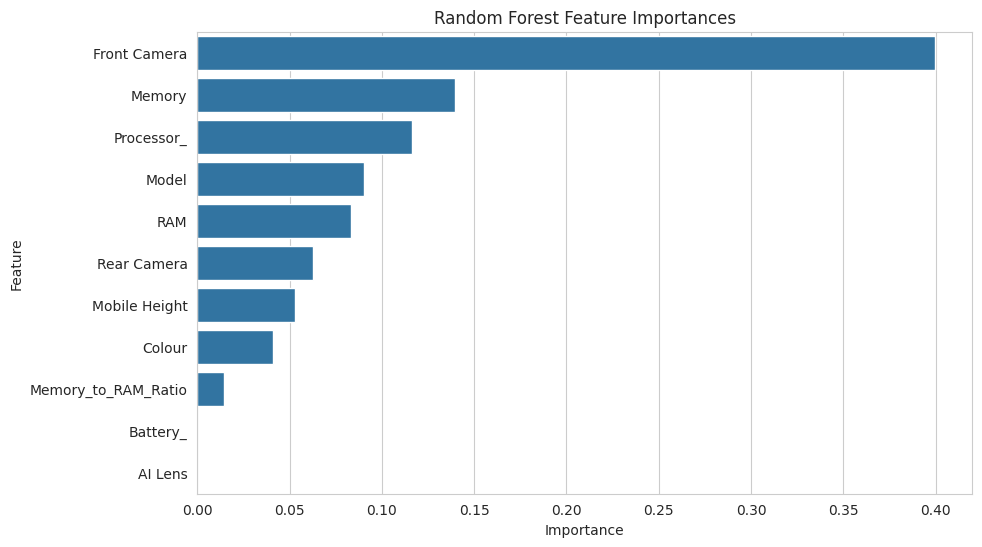

In [130]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()